In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [2]:
%autosave 120

Autosaving every 120 seconds


# Problem statement
fill our event space with individuals passionate about increasing the participation of women in technology, and to concurrently build awareness and reach.

to use MTA subway data, which as I’m sure you know is available freely from the city, to help us optimize the placement of our street teams, such that we can gather the most signatures, ideally from those who will attend the gala and contribute to our cause


In [3]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [57]:
import dateutil.parser
import pickle

In [5]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

# MTA Data

In [107]:
mta_data = pickle.load(open("mta_data_sorted.p", "rb"))

In [108]:
mta_data['Day_of_week'] = mta_data['date_parsed'].dt.weekday_name
mta_data['weekday'] = mta_data['date_parsed'].dt.weekday

In [109]:
mta_data.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time,date_parsed,Turnstile,Entries_next,New_entries,Turnstile_next,Turnstile_not_same,Day_of_week,weekday
16719,B023,R211,01-06-02,KINGS HWY,BQ,BMT,03/27/2017,08:00:00,REGULAR,5085035,3525076,2017-03-27 08:00:00,2017-03-27,B023 01-06-02,5.086e+06,566.0,B023 01-06-02,False,Monday,0
94337,N506,R022,00-00-00,34 ST-HERALD SQ,BDFMNQR,IND,04/13/2016,20:00:00,REGULAR,3994172,6479878,2016-04-13 20:00:00,2016-04-13,N506 00-00-00,3.995e+06,548.0,N506 00-00-00,False,Wednesday,2
98286,N519,R461,00-03-02,B'WAY-LAFAYETTE,BDFQ6,IND,05/23/2016,07:27:42,REGULAR,4766823,2658976,2016-05-23 07:27:42,2016-05-23,N519 00-03-02,4.767e+06,40.0,N519 00-03-02,False,Monday,0
127654,R124,R290,03-00-02,HOUSTON ST,1,IRT,03/31/2017,05:00:00,REGULAR,1114306,2916920,2017-03-31 05:00:00,2017-03-31,R124 03-00-02,1.114e+06,27.0,R124 03-00-02,False,Friday,4
103950,N559,R425,00-00-01,AVENUE U,F,IND,03/28/2017,09:00:00,REGULAR,2919830,2119544,2017-03-28 09:00:00,2017-03-28,N559 00-00-01,2.920e+06,72.0,N559 00-00-01,False,Tuesday,1


In [110]:
mta_data.shape

(1919667, 20)

In [111]:
mta_data['Day_of_week'].value_counts()

Monday       278332
Tuesday      277880
Wednesday    275273
Thursday     275011
Saturday     272970
Sunday       271861
Friday       268340
Name: Day_of_week, dtype: int64

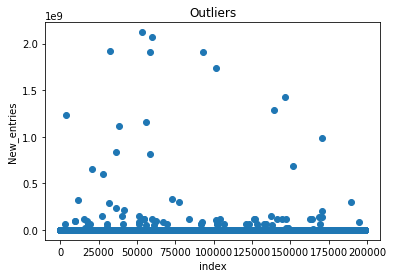

In [112]:
#OUTLIERS!!!!
stations = mta_data.index
entries = mta_data.New_entries
plt.scatter(stations, entries)
plt.xlabel('index')
plt.ylabel('New_entries')
plt.title('Outliers')


In [113]:
mta_data['New_entries'].quantile(.95)

727.0

In [114]:
mta_data['New_entries'].quantile(.99)

1328.0

In [115]:
mta_data['New_entries'].describe()

count    1.920e+06
mean     1.623e+04
std      4.287e+06
min      0.000e+00
25%      1.100e+01
50%      8.100e+01
75%      2.590e+02
max      2.122e+09
Name: New_entries, dtype: float64

In [26]:
mta_data['STATION'].value_counts()
# reflects number of turnstiles * number of dates

34 ST-PENN STA     42202
FULTON ST          40391
23 ST              28890
GRD CNTRL-42 ST    25420
CANAL ST           24800
34 ST-HERALD SQ    22719
CHAMBERS ST        22490
86 ST              21935
59 ST              21706
WALL ST            20866
TIMES SQ-42 ST     20598
ATL AV-BARCLAY     20416
                   ...  
NORWOOD AV          1140
BAY RIDGE-95 ST     1122
ORCHARD BEACH       1045
SUTTER AV-RUTLD     1002
JUNIUS ST            990
SUTTER AV            835
CLEVELAND ST         833
NASSAU AV            744
PATH WTC 2           703
WILSON AV            676
SARATOGA AV          423
PENNSYLVANIA AV      378
Name: STATION, dtype: int64

In [116]:
#First attempt at getting rid of extreme outliers
mta_data = mta_data.query('New_entries < 10000')
mta_data.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time,date_parsed,Turnstile,Entries_next,New_entries,Turnstile_next,Turnstile_not_same,Day_of_week,weekday
181308,R527,R122,00-03-00,90 ST-ELMHURST,7,IRT,04/04/2017,08:00:00,REGULAR,5295204,6035519,2017-04-04 08:00:00,2017-04-04,R527 00-03-00,5.296e+06,538.0,R527 00-03-00,False,Tuesday,1
186299,R622,R123,00-00-01,FRANKLIN AV,2345S,IRT,04/13/2016,12:00:00,REGULAR,303021690,101013291,2016-04-13 12:00:00,2016-04-13,R622 00-00-01,3.030e+08,385.0,R622 00-00-01,False,Wednesday,2
146449,R228,R143,00-00-00,28 ST,6,IRT,04/30/2016,01:00:00,REGULAR,2127016,3729428,2016-04-30 01:00:00,2016-04-30,R228 00-00-00,2.127e+06,28.0,R228 00-00-00,False,Saturday,5
103422,N548,R420,00-00-01,DITMAS AV,F,IND,05/10/2016,01:00:00,REGULAR,2253535,1703166,2016-05-10 01:00:00,2016-05-10,N548 00-00-01,2.254e+06,13.0,N548 00-00-01,False,Tuesday,1
125023,R131,R190,00-00-01,23 ST,1,IRT,04/23/2016,09:00:00,REGULAR,4096457,1550491,2016-04-23 09:00:00,2016-04-23,R131 00-00-01,4.097e+06,270.0,R131 00-00-01,False,Saturday,5


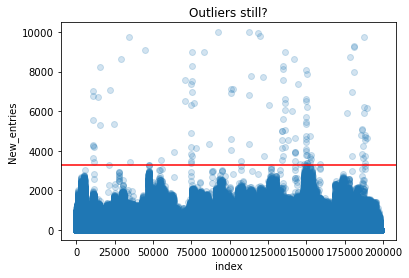

In [117]:
stations = mta_data.index
entries = mta_data.New_entries
plt.scatter(stations, entries, alpha = 0.2)
plt.axhline(y=3300, color='r')
plt.xlabel('index')
plt.ylabel('New_entries')
plt.title('Outliers still?')

In [118]:
# One more attempt at getting rid of outliers
mta_data = mta_data.query('New_entries < 3300')
mta_data.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time,date_parsed,Turnstile,Entries_next,New_entries,Turnstile_next,Turnstile_not_same,Day_of_week,weekday
146911,R232A,R176,03-05-01,33 ST,6,IRT,05/31/2016,17:00:00,REGULAR,117440512,24,2016-05-31 17:00:00,2016-05-31,R232A 03-05-01,1.174e+08,0.0,R232A 03-05-01,False,Tuesday,1
121214,R110,R027,01-03-01,WALL ST,23,IRT,05/04/2016,00:00:00,REGULAR,4583748,2497434,2016-05-04 00:00:00,2016-05-04,R110 01-03-01,4.584e+06,15.0,R110 01-03-01,False,Wednesday,2
163155,R317,R408,01-05-00,SIMPSON ST,25,IRT,04/21/2016,09:00:00,REGULAR,547,0,2016-04-21 09:00:00,2016-04-21,R317 01-05-00,5.470e+02,0.0,R317 01-05-00,False,Thursday,3
103879,N550,R242,01-06-01,18 AV,F,IND,05/03/2016,08:00:00,REGULAR,2949504,1681660,2016-05-03 08:00:00,2016-05-03,N550 01-06-01,2.950e+06,243.0,N550 01-06-01,False,Tuesday,1
1861,A013,R081,01-03-01,49 ST,NQR,BMT,04/18/2016,20:00:00,REGULAR,4412773,2307074,2016-04-18 20:00:00,2016-04-18,A013 01-03-01,4.413e+06,299.0,A013 01-03-01,False,Monday,0


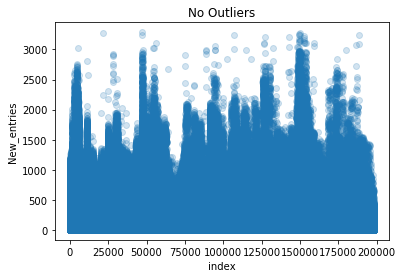

In [119]:
# Should be clean.
stations = mta_data.index
entries = mta_data.New_entries
plt.scatter(stations, entries, alpha = 0.2)
# plt.axhline(y=3300, color='r')
plt.xlabel('index')
plt.ylabel('New_entries')
plt.title('No Outliers')

In [34]:
mta_data['Day_of_week'].value_counts()

Monday       278316
Tuesday      277846
Wednesday    275242
Thursday     274966
Saturday     272957
Sunday       271855
Friday       264558
Name: Day_of_week, dtype: int64

In [36]:
# mta_data version 1: groupby station
mta_stations = (mta_data.groupby(['STATION'],as_index=False)
                .sum().sort_values(by=['New_entries'],ascending=False)
               )[:20]
mta_stations['Rank'] = mta_stations['New_entries'].rank(ascending=False)
mta_stations
# total number of new entries per station, sorted and ranked.

,STATION,ENTRIES,EXITS,Entries_next,New_entries,Turnstile_not_same,weekday,Rank
61,34 ST-PENN STA,1429896367005,768930033401,1.430e+12,1.014e+07,False,125095,1.0
233,GRD CNTRL-42 ST,1201903962639,319456841942,1.202e+12,8.730e+06,False,75415,2.0
59,34 ST-HERALD SQ,862694994380,787803529254,8.627e+11,7.334e+06,False,67757,3.0
46,23 ST,1644462618882,1418884885420,1.644e+12,7.156e+06,False,86211,4.0
14,14 ST-UNION SQ,564967488600,192442969162,5.650e+11,6.699e+06,False,47163,5.0
110,86 ST,982347367112,1066640438556,9.824e+11,6.563e+06,False,65310,6.0
355,TIMES SQ-42 ST,1614213933319,1302389796469,1.614e+12,6.005e+06,False,61602,7.0
68,42 ST-PORT AUTH,2412234151321,1791320154796,2.412e+12,5.749e+06,False,60092,8.0
226,FULTON ST,1692651794458,1775504444780,1.693e+12,4.966e+06,False,119975,9.0
85,59 ST,547186848275,400040288418,5.472e+11,4.848e+06,False,64588,10.0


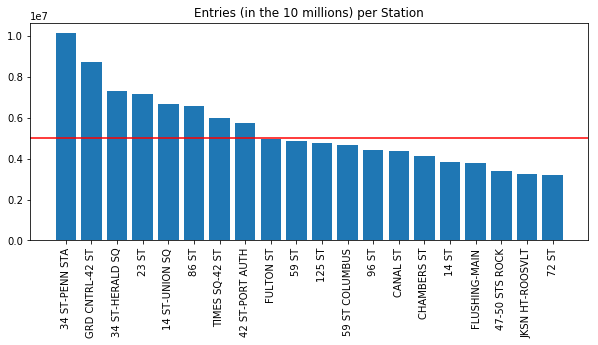

In [37]:
# Plotting stations with the most traffic overall
stations = list(mta_stations.Rank)
entries = list(mta_stations.New_entries)

plt.figure(figsize=(10, 4))
labels = list(mta_stations.STATION)

plt.bar(stations, entries)
plt.axhline(y=5.0e+06, color='r')
plt.xticks(stations, labels, rotation ='vertical')
plt.title('Entries (in the 10 millions) per Station')
plt.savefig('stations_2.png', bbox_inches='tight')

In [38]:
mta_stat = mta_stations[['Rank','STATION']][:10]
mta_stat

,Rank,STATION
61,1.0,34 ST-PENN STA
233,2.0,GRD CNTRL-42 ST
59,3.0,34 ST-HERALD SQ
46,4.0,23 ST
14,5.0,14 ST-UNION SQ
110,6.0,86 ST
355,7.0,TIMES SQ-42 ST
68,8.0,42 ST-PORT AUTH
226,9.0,FULTON ST
85,10.0,59 ST


In [39]:
#mta_data version 2: MTA data only limited to the top 10 ranked stations.
mta_top = mta_stat.merge(mta_data, how='left', on='STATION')
mta_data.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time,date_parsed,Turnstile,Entries_next,New_entries,Turnstile_next,Turnstile_not_same,Day_of_week,weekday
83048,N330C,R202,01-06-00,63 DR-REGO PARK,MR,IND,05/27/2016,04:00:00,REGULAR,100828593,119567,2016-05-27 04:00:00,2016-05-27,N330C 01-06-00,1.008e+08,58.0,N330C 01-06-00,False,Friday,4
115858,PTH11,R545,00-04-04,14TH STREET,1,PTH,03/27/2017,11:19:50,REGULAR,1697,72931,2017-03-27 11:19:50,2017-03-27,PTH11 00-04-04,1.697e+03,0.0,PTH11 00-04-04,False,Monday,0
25511,E001,R368,00-00-01,9 AV,D,BMT,04/10/2016,09:00:00,REGULAR,2361283,1895703,2016-04-10 09:00:00,2016-04-10,E001 00-00-01,2.361e+06,211.0,E001 00-00-01,False,Sunday,6
130873,R159,R164,01-06-01,66 ST-LINCOLN,1,IRT,05/16/2016,09:00:00,REGULAR,2160695,12974470,2016-05-16 09:00:00,2016-05-16,R159 01-06-01,2.161e+06,23.0,R159 01-06-01,False,Monday,0
123146,R121,R290,01-05-00,HOUSTON ST,1,IRT,04/29/2016,01:00:00,REGULAR,682,0,2016-04-29 01:00:00,2016-04-29,R121 01-05-00,6.820e+02,0.0,R121 01-05-00,False,Friday,4


In [40]:
mta_top['STATION'].unique()

array(['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '23 ST',
       '14 ST-UNION SQ', '86 ST', 'TIMES SQ-42 ST', '42 ST-PORT AUTH',
       'FULTON ST', '59 ST'], dtype=object)

In [41]:
# Total new entries for each stations' weekday
mta_day = (mta_top.groupby(['Rank', 'STATION', 'weekday', 'Day_of_week',],as_index=False)
           .sum()
          )
mta_day.head(20)

,Rank,STATION,weekday,Day_of_week,ENTRIES,EXITS,Entries_next,New_entries,Turnstile_not_same
0,1.0,34 ST-PENN STA,0,Monday,221784021326,116867453934,2.218e+11,1.637e+06,False
1,1.0,34 ST-PENN STA,1,Tuesday,206127802016,109321987712,2.061e+11,1.738e+06,False
2,1.0,34 ST-PENN STA,2,Wednesday,211030834259,115165544813,2.110e+11,1.735e+06,False
3,1.0,34 ST-PENN STA,3,Thursday,188485871743,103872287197,1.885e+11,1.747e+06,False
4,1.0,34 ST-PENN STA,4,Friday,198070629670,109538299763,1.981e+11,1.669e+06,False
5,1.0,34 ST-PENN STA,5,Saturday,204624471505,108713798176,2.046e+11,8.612e+05,False
6,1.0,34 ST-PENN STA,6,Sunday,199772736486,105450661806,1.998e+11,7.541e+05,False
7,2.0,GRD CNTRL-42 ST,0,Monday,178844703466,46781372423,1.788e+11,1.429e+06,False
8,2.0,GRD CNTRL-42 ST,1,Tuesday,171448723868,46384144077,1.715e+11,1.638e+06,False
9,2.0,GRD CNTRL-42 ST,2,Wednesday,172868707552,45985831512,1.729e+11,1.609e+06,False


# Final MTA data

In [43]:
# clean dataframe of only necessary entries
mta = mta_day[['STATION', 'Rank', 'weekday', 'Day_of_week', 'New_entries']]
mta

,STATION,Rank,weekday,Day_of_week,New_entries
0,34 ST-PENN STA,1.0,0,Monday,1.637e+06
1,34 ST-PENN STA,1.0,1,Tuesday,1.738e+06
2,34 ST-PENN STA,1.0,2,Wednesday,1.735e+06
3,34 ST-PENN STA,1.0,3,Thursday,1.747e+06
4,34 ST-PENN STA,1.0,4,Friday,1.669e+06
5,34 ST-PENN STA,1.0,5,Saturday,8.612e+05
6,34 ST-PENN STA,1.0,6,Sunday,7.541e+05
7,GRD CNTRL-42 ST,2.0,0,Monday,1.429e+06
8,GRD CNTRL-42 ST,2.0,1,Tuesday,1.638e+06
9,GRD CNTRL-42 ST,2.0,2,Wednesday,1.609e+06


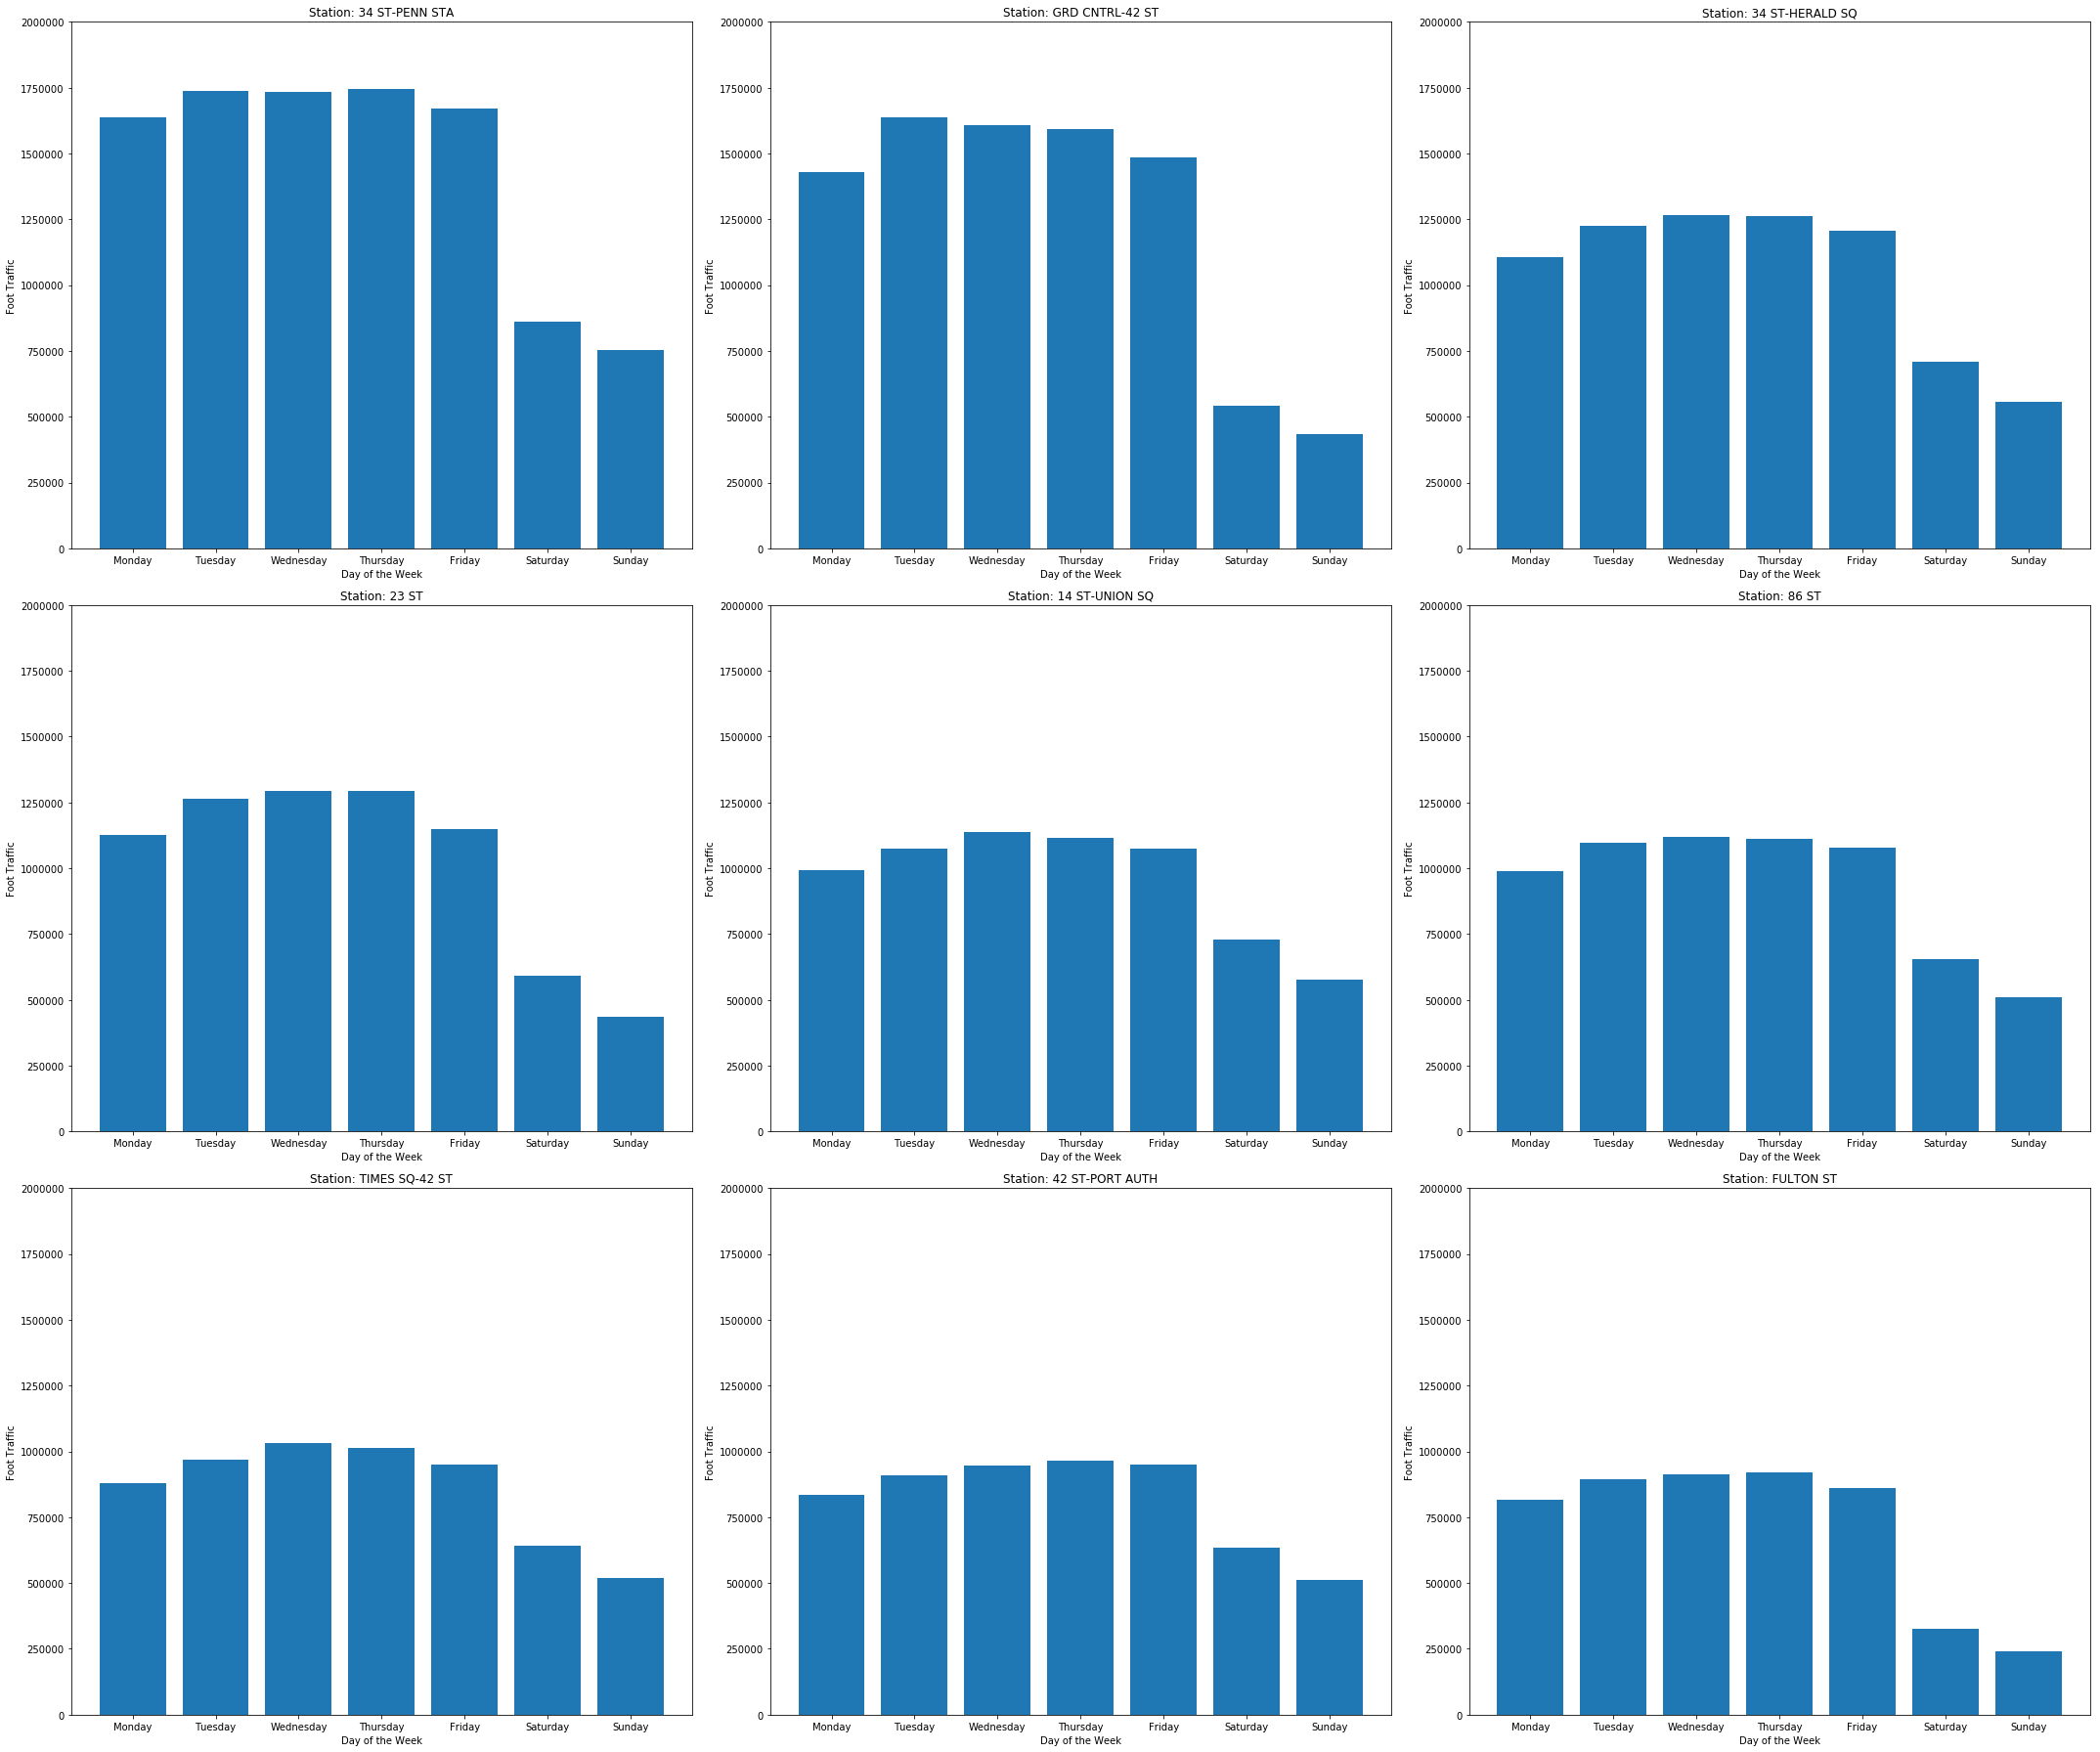

In [72]:
days = mta.weekday.unique()
labels = mta.Day_of_week

plt.figure(figsize=(30, 25))

for n in range(0,9):
    plt.subplot(3, 3, n+1)
    plt.ylim([0, 2000000])
    plt.tight_layout()
    plt.ylabel('Foot Traffic')
    plt.xlabel('Day of the Week')
    plt.bar(days, mta.query('Rank == %d' %(n+1)).New_entries)
    plt.xticks(days, labels, rotation ='horizontal')
    plt.title('Station: %s' %mta.STATION.unique()[n])
    
plt.savefig('Station_subplots.png', bbox_inches='tight')


# Subway Geo Location data

In [22]:
subway = pd.read_csv('~/bootcamp/stations.csv')
# curl website > file.txt

In [41]:
subway['Station_Name'].nunique()

355

In [40]:
mta_data['STATION'].nunique()

380

In [23]:
subway.head()

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Route_7,Route_8,Route_9,Route_10,Route_11,Entrance_Type,Entry,Exit_Only,Vending,Staffing,Staff_Hours,ADA,ADA_Notes,Free_Crossover,North_South_Street,East_West_Street,Corner,Latitude,Longitude
0,BMT,Astoria,Ditmars Blvd,40.775,-73.912,N,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.775,-73.912
1,BMT,Astoria,Ditmars Blvd,40.775,-73.912,N,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.775,-73.912
2,BMT,Astoria,Ditmars Blvd,40.775,-73.912,N,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.775,-73.912
3,BMT,Astoria,Ditmars Blvd,40.775,-73.912,N,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.775,-73.912
4,BMT,Astoria,Astoria Blvd-Hoyt Av,40.770,-73.918,N,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,31st St,Hoyt Ave South,SW,40.770,-73.918


In [24]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 30 columns):
Division              1866 non-null object
Line                  1866 non-null object
Station_Name          1866 non-null object
Station_Latitude      1866 non-null float64
Station_Longitude     1866 non-null float64
Route_1               1866 non-null object
Route_2               1020 non-null object
Route_3               494 non-null object
Route_4               321 non-null object
Route_5               238 non-null object
Route_6               127 non-null object
Route_7               80 non-null object
Route_8               48 non-null float64
Route_9               28 non-null float64
Route_10              23 non-null float64
Route_11              23 non-null float64
Entrance_Type         1866 non-null object
Entry                 1866 non-null object
Exit_Only             56 non-null object
Vending               1866 non-null object
Staffing              1866 non-null object


# College geo location data

In [58]:
college = pd.read_csv('~/bootcamp/COLLEGE_UNIVERSITY.csv')

In [59]:
college.head()

,the_geom,NAME,HOUSENUM,STREETNAME,CITY,ZIP,URL,BIN,BBL
0,POINT (-73.99465215457163 40.73519616365903),New School University / Parsons School Of Design,66,FIFTH AVENUE,New York,10011,http://www.parsons.edu/html/splash.html,1009619,1.006e+09
1,POINT (-73.99706966379965 40.73546280987431),New School University / The New School,66,WEST 12 STREET,New York,10011,http://www.newschool.edu/,1083136,1.006e+09
2,POINT (-74.00681944352681 40.723441859057495),Metropolitan College,75,VARICK STREET,New York,10013,http://www.metropolitan.edu/,1002934,1.002e+09
3,POINT (-73.79439300079635 40.73944287003665),School Of Nursing Of St. Vincents Catholic Med...,175-05,HORACE HARDING EXPRESSWAY,Fresh Meadows,11365,http://www.svcmc.org/portal/training/allied_he...,4148794,4.069e+09
4,POINT (-73.84872054010768 40.721371886956774),Bramson Ort College,69-30,AUSTIN STREET,Forest Hills,11375,http://www.bramsonort.org/,4077468,4.032e+09


In [27]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
the_geom      77 non-null object
NAME          77 non-null object
HOUSENUM      76 non-null object
STREETNAME    77 non-null object
CITY          77 non-null object
ZIP           77 non-null int64
URL           77 non-null object
BIN           77 non-null int64
BBL           74 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 5.5+ KB


In [91]:
college_test = college.copy()

In [92]:
college_test['the_geom'] = college_test['the_geom'].str.strip('POINT')
# lat_long = lat_long.str.strip('()')
# pointless = lat_long.str.strip(')') Worked
# geo = pointless.str.strip('(') did not work

college_test['the_geom'].head()

0      (-73.99465215457163 40.73519616365903)
1      (-73.99706966379965 40.73546280987431)
2     (-74.00681944352681 40.723441859057495)
3      (-73.79439300079635 40.73944287003665)
4     (-73.84872054010768 40.721371886956774)
Name: the_geom, dtype: object

In [93]:
college_test['the_geom'] = college_test['the_geom'].map(lambda x: str(x)[:-1])
college_test['the_geom'] = college_test['the_geom'].map(lambda x: str(x)[2:])
college_test['the_geom'].head()

0     -73.99465215457163 40.73519616365903
1     -73.99706966379965 40.73546280987431
2    -74.00681944352681 40.723441859057495
3     -73.79439300079635 40.73944287003665
4    -73.84872054010768 40.721371886956774
Name: the_geom, dtype: object

In [94]:
college_test['the_geom'] = college_test['the_geom'].str.split(' ')
college_test['the_geom'].head()

0     [-73.99465215457163, 40.73519616365903]
1     [-73.99706966379965, 40.73546280987431]
2    [-74.00681944352681, 40.723441859057495]
3     [-73.79439300079635, 40.73944287003665]
4    [-73.84872054010768, 40.721371886956774]
Name: the_geom, dtype: object

In [95]:
college_test['lat'] = college_test['the_geom'].apply(lambda x: x[1])
college_test['long'] = college_test['the_geom'].apply(lambda x: x[0])
college_test.head()

,the_geom,NAME,HOUSENUM,STREETNAME,CITY,ZIP,URL,BIN,BBL,lat,long
0,"[-73.99465215457163, 40.73519616365903]",New School University / Parsons School Of Design,66,FIFTH AVENUE,New York,10011,http://www.parsons.edu/html/splash.html,1009619,1.006e+09,40.73519616365903,-73.99465215457163
1,"[-73.99706966379965, 40.73546280987431]",New School University / The New School,66,WEST 12 STREET,New York,10011,http://www.newschool.edu/,1083136,1.006e+09,40.73546280987431,-73.99706966379965
2,"[-74.00681944352681, 40.723441859057495]",Metropolitan College,75,VARICK STREET,New York,10013,http://www.metropolitan.edu/,1002934,1.002e+09,40.723441859057495,-74.00681944352681
3,"[-73.79439300079635, 40.73944287003665]",School Of Nursing Of St. Vincents Catholic Med...,175-05,HORACE HARDING EXPRESSWAY,Fresh Meadows,11365,http://www.svcmc.org/portal/training/allied_he...,4148794,4.069e+09,40.73944287003665,-73.79439300079635
4,"[-73.84872054010768, 40.721371886956774]",Bramson Ort College,69-30,AUSTIN STREET,Forest Hills,11375,http://www.bramsonort.org/,4077468,4.032e+09,40.721371886956774,-73.84872054010768


# Mariya's Fuzzy Wuzzy dataframe

In [73]:
names = pickle.load(open("final_for_charts.p", "rb"))
# Connecting MTA data & Subway data on a fuzzy wuzzy match 
# between MTA data's 'STATION' and Subway data's 'STATION_NAME'

In [74]:
names.head()

,Station_Name_Clean,distance,flag,STATION_NAME,STATION,MATCH_SCORE
0,1 AV,0.409,11,1 AV,1 AV,100
1,103 ST,0.709,5,103 ST,103 ST,100
2,103 ST,0.709,5,103 ST,103 ST-CORONA,90
3,110 ST,0.583,3,110 ST,110 ST,100
4,111 ST,1.776,0,111 ST,111 ST,100


In [87]:
name_mta = mta_stations.merge(Names, how='left', on='STATION')

clean_name = (name_mta[['STATION', 'STATION_NAME', 'MATCH_SCORE', 'New_entries', 'distance', 'flag']]
              .drop(name_mta.index[[11]]))
clean_name

,STATION,STATION_NAME,MATCH_SCORE,New_entries,distance,flag
0,34 ST-PENN STA,34 ST,90,1.014e+07,0.269,7
1,GRD CNTRL-42 ST,42 ST,90,8.730e+06,0.441,7
2,34 ST-HERALD SQ,34 ST,90,7.334e+06,0.269,7
3,23 ST,23 ST,100,7.156e+06,0.100,14
4,14 ST-UNION SQ,14 ST,90,6.699e+06,0.405,10
5,86 ST,86 ST,100,6.563e+06,3.417,0
6,TIMES SQ-42 ST,42 ST,90,6.005e+06,0.441,7
7,42 ST-PORT AUTH,42 ST,90,5.749e+06,0.441,7
8,FULTON ST,FULTON ST,100,4.966e+06,0.443,7
9,59 ST,59 ST,100,4.848e+06,3.449,0


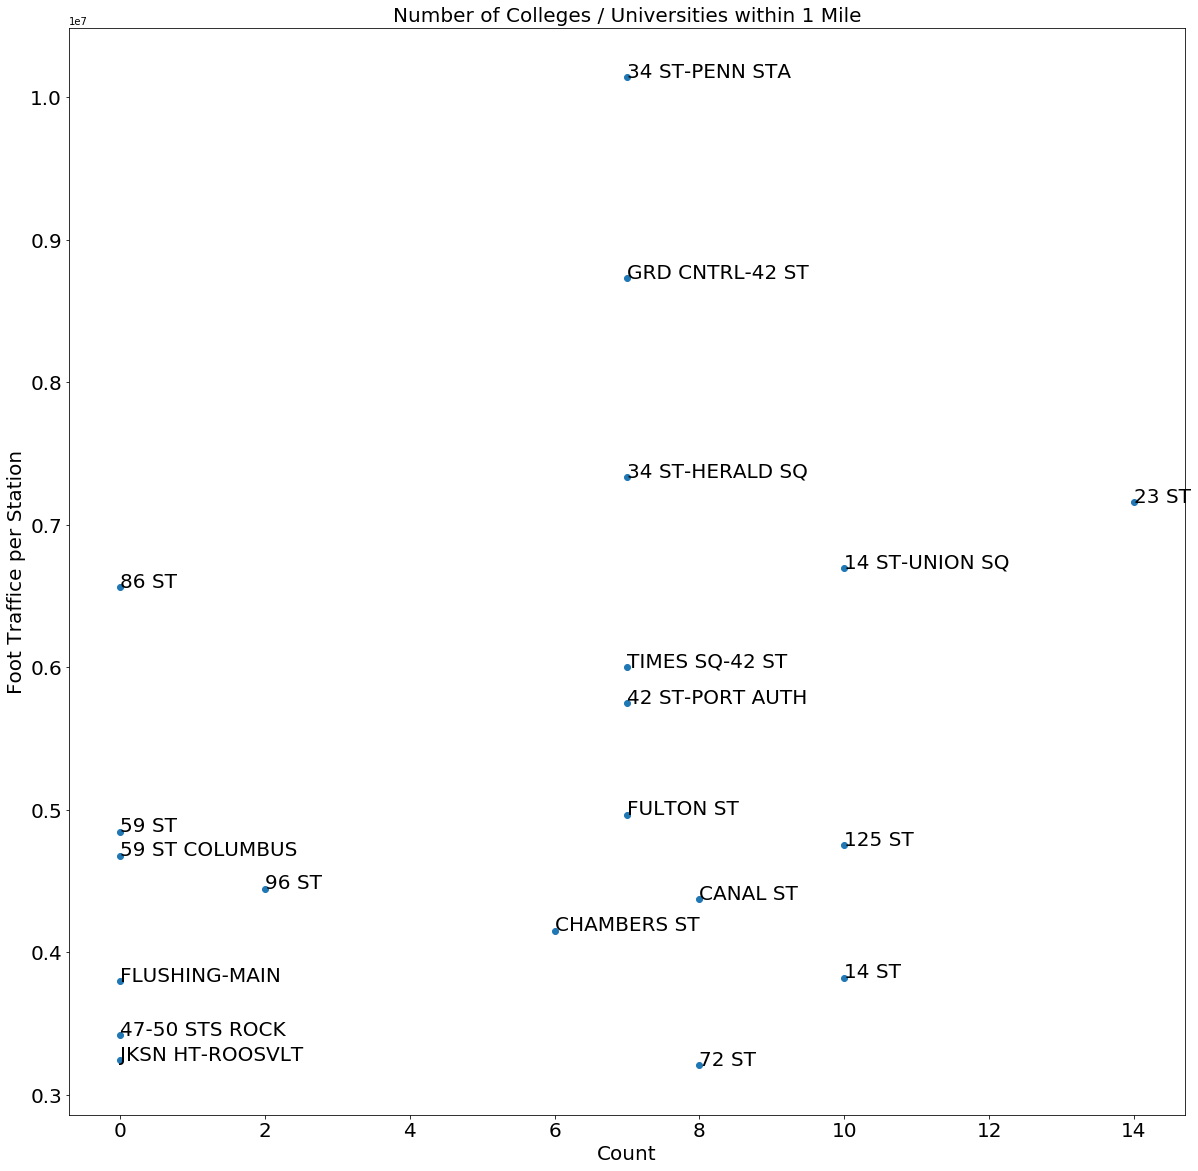

In [103]:
# Number of Colleges within 1 mile of Stations vs. Foot Traffic per Station
flags = name_mta.flag
entries = name_mta.New_entries
labels = list(name_mta.STATION)

plt.figure(figsize=(20, 20))

plt.scatter(flags, entries)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Foot Traffice per Station', fontsize=20)
plt.title('Number of Colleges / Universities within 1 Mile', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for i, n in enumerate(labels):
    plt.annotate(n, (flags[i], entries[i]), fontsize=20)
    
plt.savefig('count_traffic.png', bbox_inches='tight')

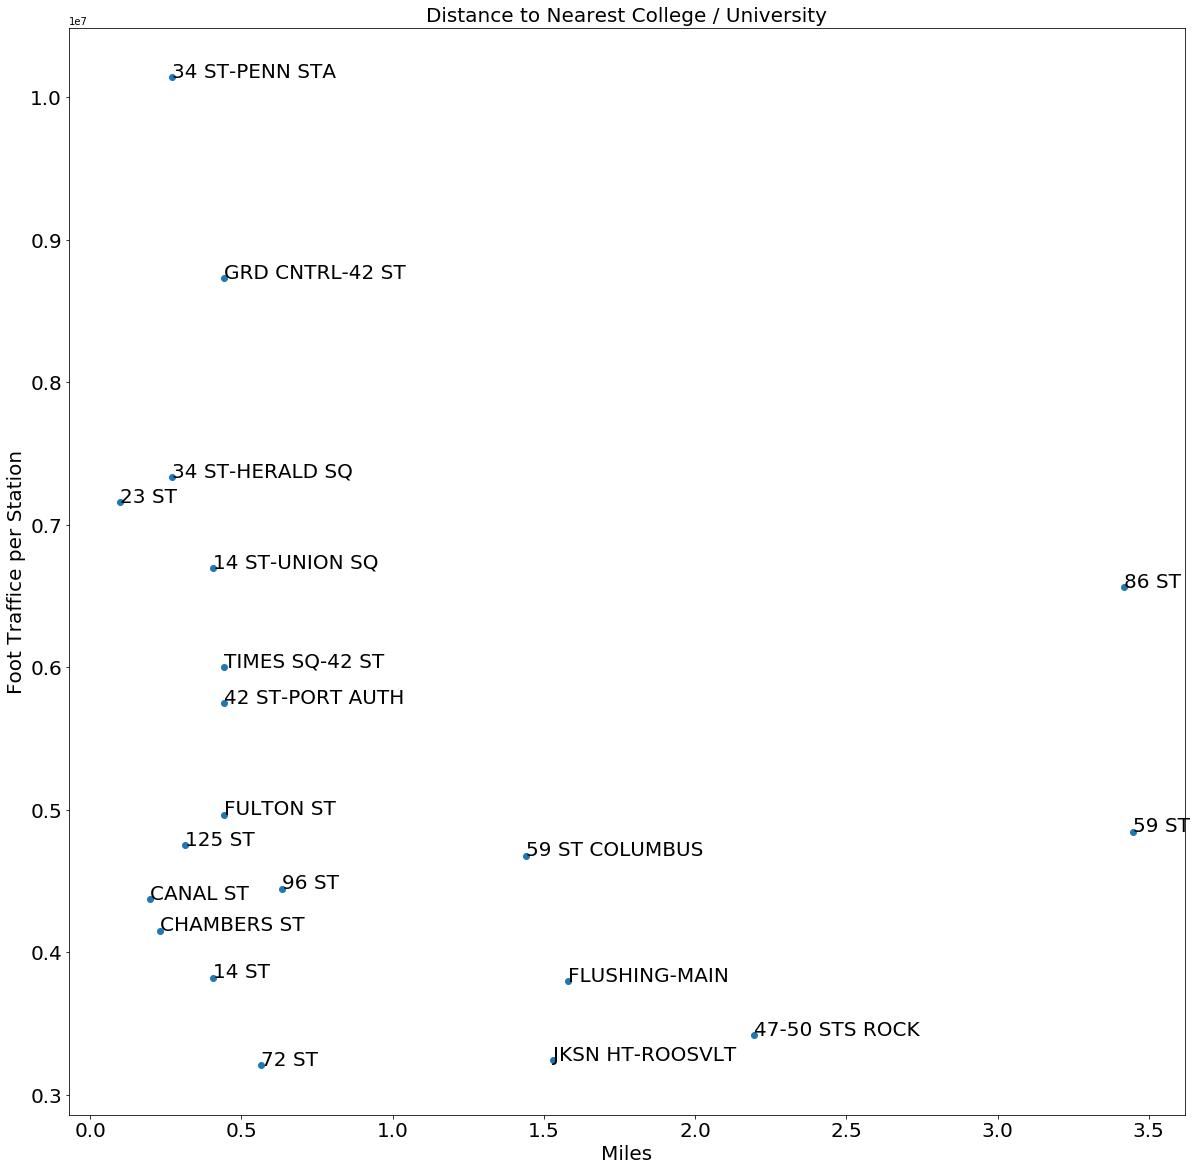

In [106]:
# Distance to the Near College vs. Foot Traffic per Station
distance = name_mta.distance
entries = name_mta.New_entries
labels = list(name_mta.STATION)

plt.figure(figsize=(20, 20))

plt.scatter(distance, entries)
plt.xlabel('Miles', fontsize=20)
plt.ylabel('Foot Traffice per Station', fontsize=20)
plt.title('Distance to Nearest College / University', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for i, n in enumerate(labels):
    plt.annotate(n, (distance[i], entries[i]), fontsize=20)
    
plt.savefig('distance_traffic.png', bbox_inches='tight')